In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import & Explore the dataset

In [77]:
df = pd.read_csv("Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.shape

(7043, 21)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Convert the Total charges column data type into float


In [78]:
df["TotalCharges"] = df["TotalCharges"].replace(" ", "0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

Convert Senior Citizen Column from logical/int 1/0 to object like Yes/No for better ubderstanding

In [79]:
# #Method 1
df["SeniorCitizen"] = df["SeniorCitizen"].apply(lambda x : "Yes" if x == 1 else "No")


#Method 2
# def conv(value):
#     if value == 1:
#         return "Yes"
#     else:
#         return "No"
# df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

Checking Null values

In [11]:
df.isna().sum().sum()

np.int64(0)

Checking Duplicates

In [12]:
df.duplicated().sum()

np.int64(0)

In [15]:
df['customerID'].duplicated().sum()

np.int64(0)

In [32]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [33]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# EDA

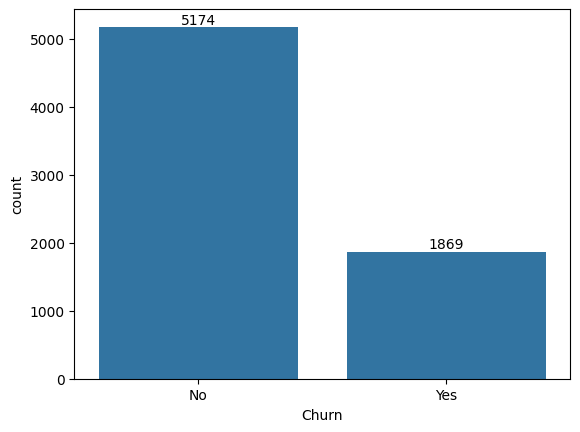

In [35]:
ax = sns.countplot(x = 'Churn', data = df)
ax.bar_label(ax.containers[0])
plt.show()

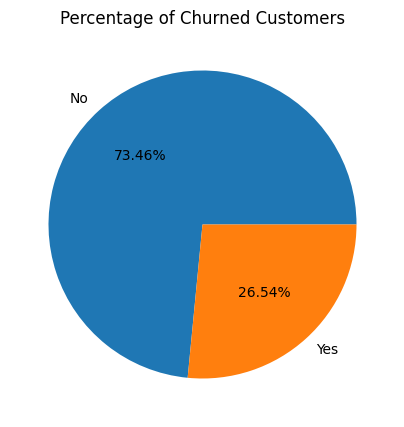

In [52]:
plt.figure(figsize= (5,5))
gb = df.groupby("Churn").agg({'Churn':'count'})
plt.pie(gb['Churn'], labels= gb.index, autopct= "%1.2f%%")
plt.title("Percentage of Churned Customers",fontsize = 12)
plt.show()

So we can colclude that 26.54% of our customers have churned out. Now Explore the reason behind it.

## --------------------------------------------

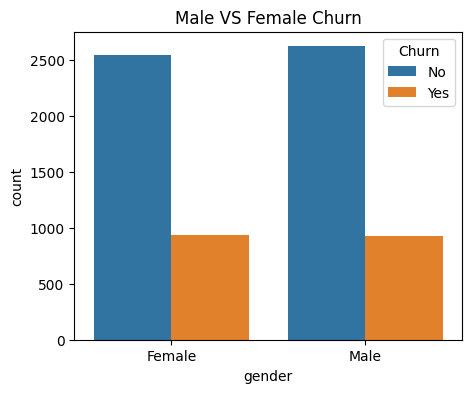

In [89]:
plt.figure(figsize= (5,4))
sns.countplot(x ='gender', data= df , hue= 'Churn')
plt.title("Male VS Female Churn")
plt.show()

In [72]:
df['SeniorCitizen']

0       No
1       No
2       No
3       No
4       No
        ..
7038    No
7039    No
7040    No
7041    No
7042    No
Name: SeniorCitizen, Length: 7043, dtype: object

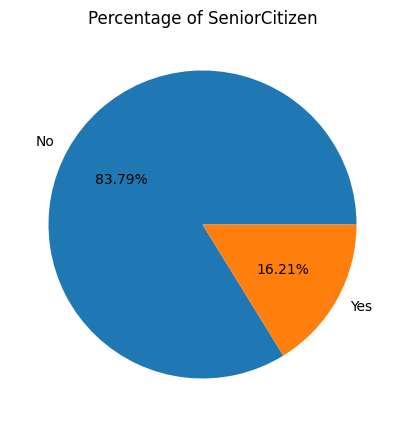

In [91]:
plt.figure(figsize= (5,5))
gb = df.groupby("SeniorCitizen").agg({'SeniorCitizen':'count'})
plt.pie(gb['SeniorCitizen'], labels= gb.index, autopct= "%1.2f%%")
plt.title("Percentage of SeniorCitizen",fontsize = 12)
plt.show()

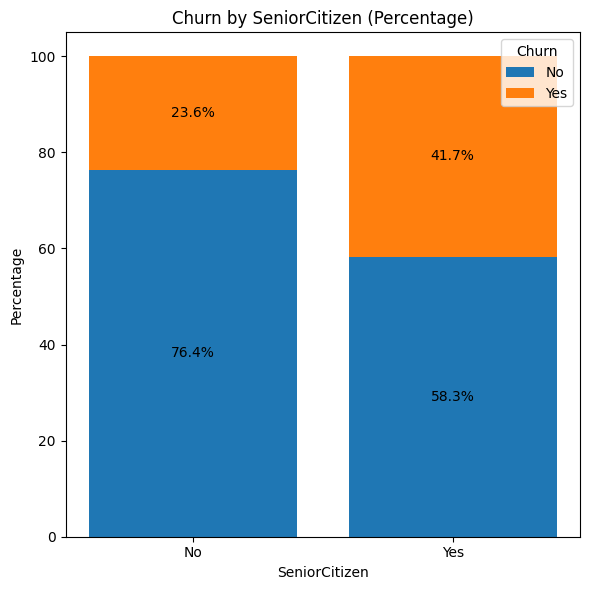

In [87]:
# Step 1: Calculate percentage data
churn_counts = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()
churn_percent = churn_counts.div(churn_counts.sum(axis=1), axis=0) * 100

# Step 2: Plot
fig, ax = plt.subplots(figsize=(6, 6))
bottom_vals = [0] * len(churn_percent)

for churn_value in churn_percent.columns:
    percents = churn_percent[churn_value]
    bars = ax.bar(churn_percent.index, percents, bottom=bottom_vals, label=churn_value)
    
    # Add percentage labels
    for i, bar in enumerate(bars):
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bottom_vals[i] + height / 2,
                f"{height:.1f}%",
                ha='center',
                va='center',
                fontsize=10
            )
    bottom_vals = [i + j for i, j in zip(bottom_vals, percents)]

# Final formatting
ax.set_title('Churn by SeniorCitizen (Percentage)')
ax.set_xlabel('SeniorCitizen')
ax.set_ylabel('Percentage')
ax.set_xticks([0, 1])
ax.set_xticklabels(['No', 'Yes'])
ax.legend(title='Churn')
plt.tight_layout()
plt.show()

Senior Cinitzens are comparetively more churned out than others even if the percentage of senior citizen is not much

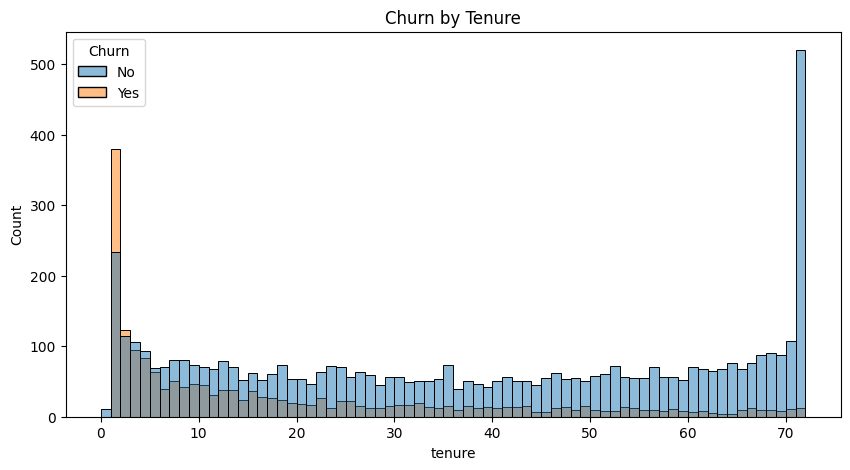

In [98]:
plt.figure(figsize= (10,5))
sns.histplot(x = 'tenure', data= df, bins = 72, hue= 'Churn')
plt.title("Churn by Tenure")
plt.show()

People who have used the services is styed and people who have used the servicess for for one or two months have churned.

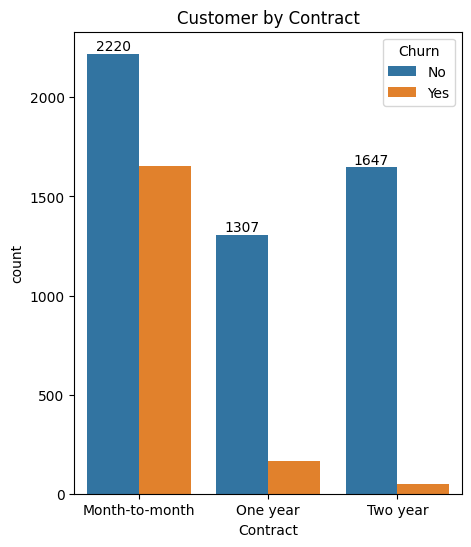

In [104]:
plt.figure(figsize= (5,6))
ax = sns.countplot(x ='Contract', data= df, hue= 'Churn')
ax.bar_label(ax.containers[0])
plt.title("Customer by Contract")
plt.show()

Chrun is high for short term contact like month to month. For the long term contract churn rate is very low.

In [105]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

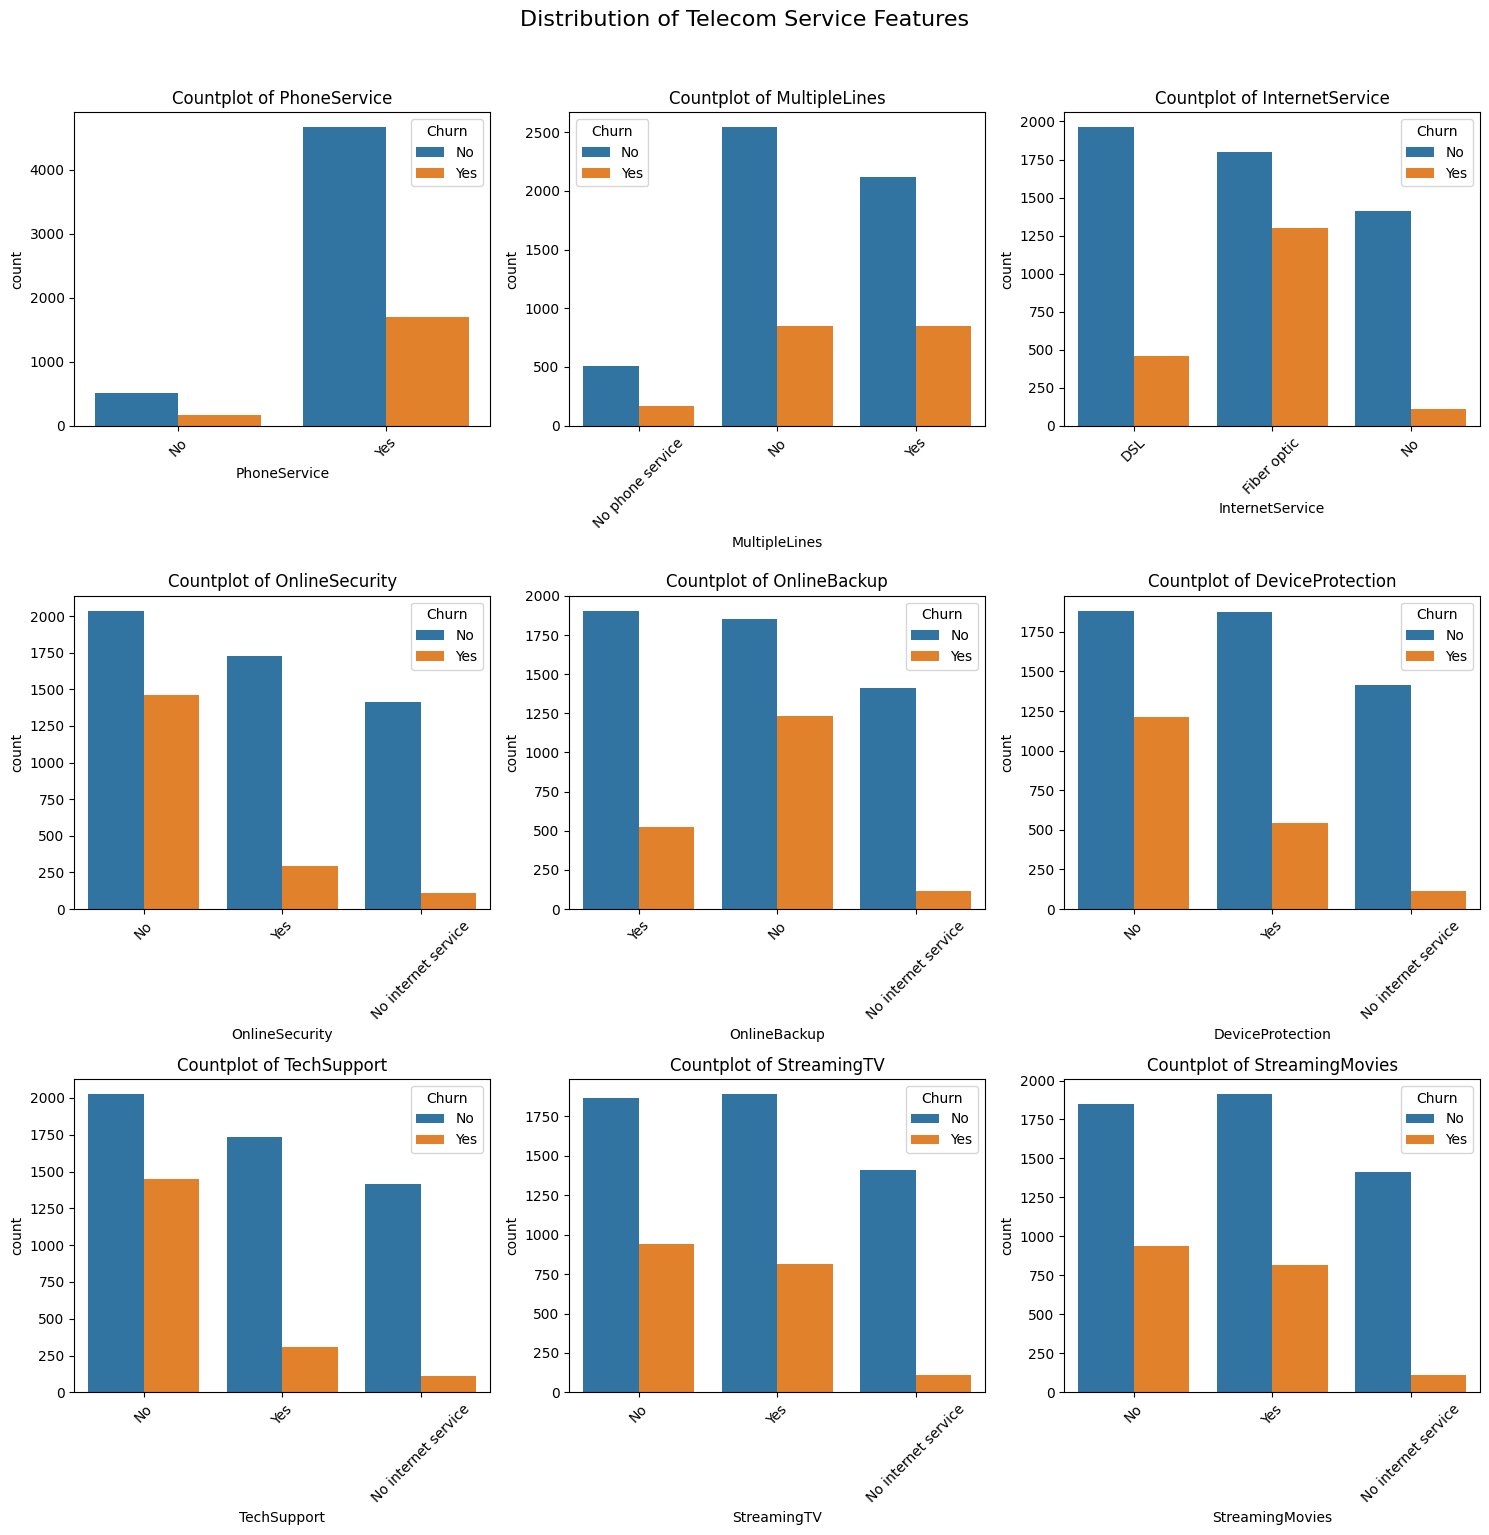

In [110]:
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
           'StreamingTV', 'StreamingMovies']

# Number of columns for subplot grid, you can change this as you like
n_cols = 3  
n_rows = (len(columns) + n_cols - 1) // n_cols  # Ceiling division for rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # flatten in case it's a 2D array

for i, col in enumerate(columns):
    sns.countplot(data=df, x=col, ax=axes[i], hue= df["Churn"])
    axes[i].set_title(f'Countplot of {col}')
    axes[i].tick_params(axis='x', rotation=45)  # rotate labels for readability if needed

# Remove empty subplots if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.suptitle('Distribution of Telecom Service Features', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


 Customers with Fiber optic internet service exhibit the highest churn rates, while those without any internet service or phone service show minimal churn. For online services like Security, Backup, Device Protection, Tech Support, Streaming TV, and Movies, customers who do not subscribe tend to have a higher likelihood of churning compared to those who do.

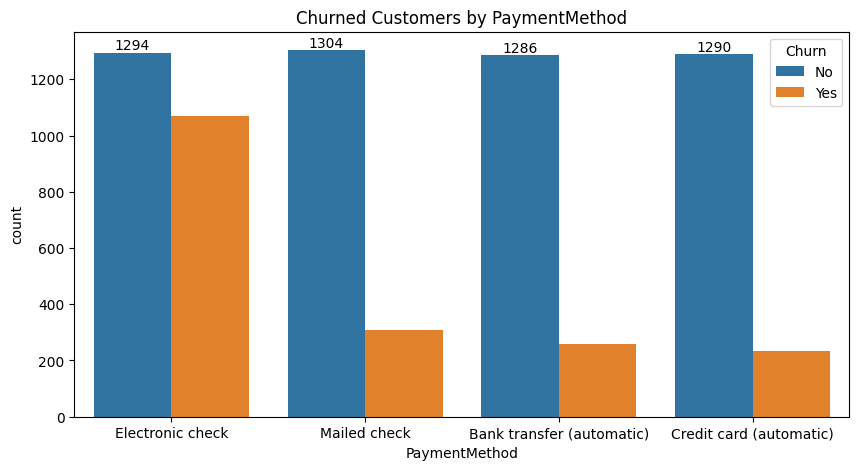

In [119]:
plt.figure(figsize= (10,5))
ax = sns.countplot(x ='PaymentMethod', data= df, hue= 'Churn')
ax.bar_label(ax.containers[0])
plt.title("Churned Customers by PaymentMethod")
plt.show()

Customer Churn is higher for Electronic Check Compared to the autometic checks.